# **Important notes**
Please follow the following naming role. Or the program would not function  normally

---

## 1. For Calcium imaging cell traces

**Raw calcium imaging file** should be named in this way: `animal_ID state.csv`. 

`state` could only be one of these options:
- `basal`
- `formalin-d1`
- `formalin-d3`
- `formalin-dn` 

**No other strings should be included before `.csv`**

Use space between strings

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os 
import seaborn as sns
from  importlib import reload
import Ca_imaging_postprocessing_functions_v2 as caf

# **Data preparation**
---

In [80]:
file_dir = r"/Users/shihchelin/Desktop/Dr. Wei-Hsin Chen -  PVT Imaging Data analysis/Raw Data/Sensory response analysis"
f_name = '-5~30 vglut2 sensory Normalized signal extraction _ stats.csv'
save_dir = r"/Users/shihchelin/Desktop/test outputs"

sensory_meta = caf.generate_sensory_metadata(file_dir, f_name)

In [ ]:
#Restandardize calcium traces with local baseline
time = sensory_meta['Trace time']
st_indx = np.where(time < 0)[0].max()
if st_indx > 0: #Only perform local re-standardization if there's a pre-stim baseline
    loc_mean, loc_std = sensory_meta["Calcium trace"][:st_indx,].mean(axis = 0), sensory_meta["Calcium trace"][:st_indx,].std(axis = 0)
    signal_z_loc = (sensory_meta['Calcium trace']-loc_mean)/loc_std#Standardize traces
#Standardize traces with global baseline 
signal_z_glob = (sensory_meta['Calcium trace']-sensory_meta['Baseline mean'])/sensory_meta['Baseline std']#Standardize traces

# **Brief check for all stim-evoked activities**
---

**Sorting of neural traces were implemented independently across stimuli**

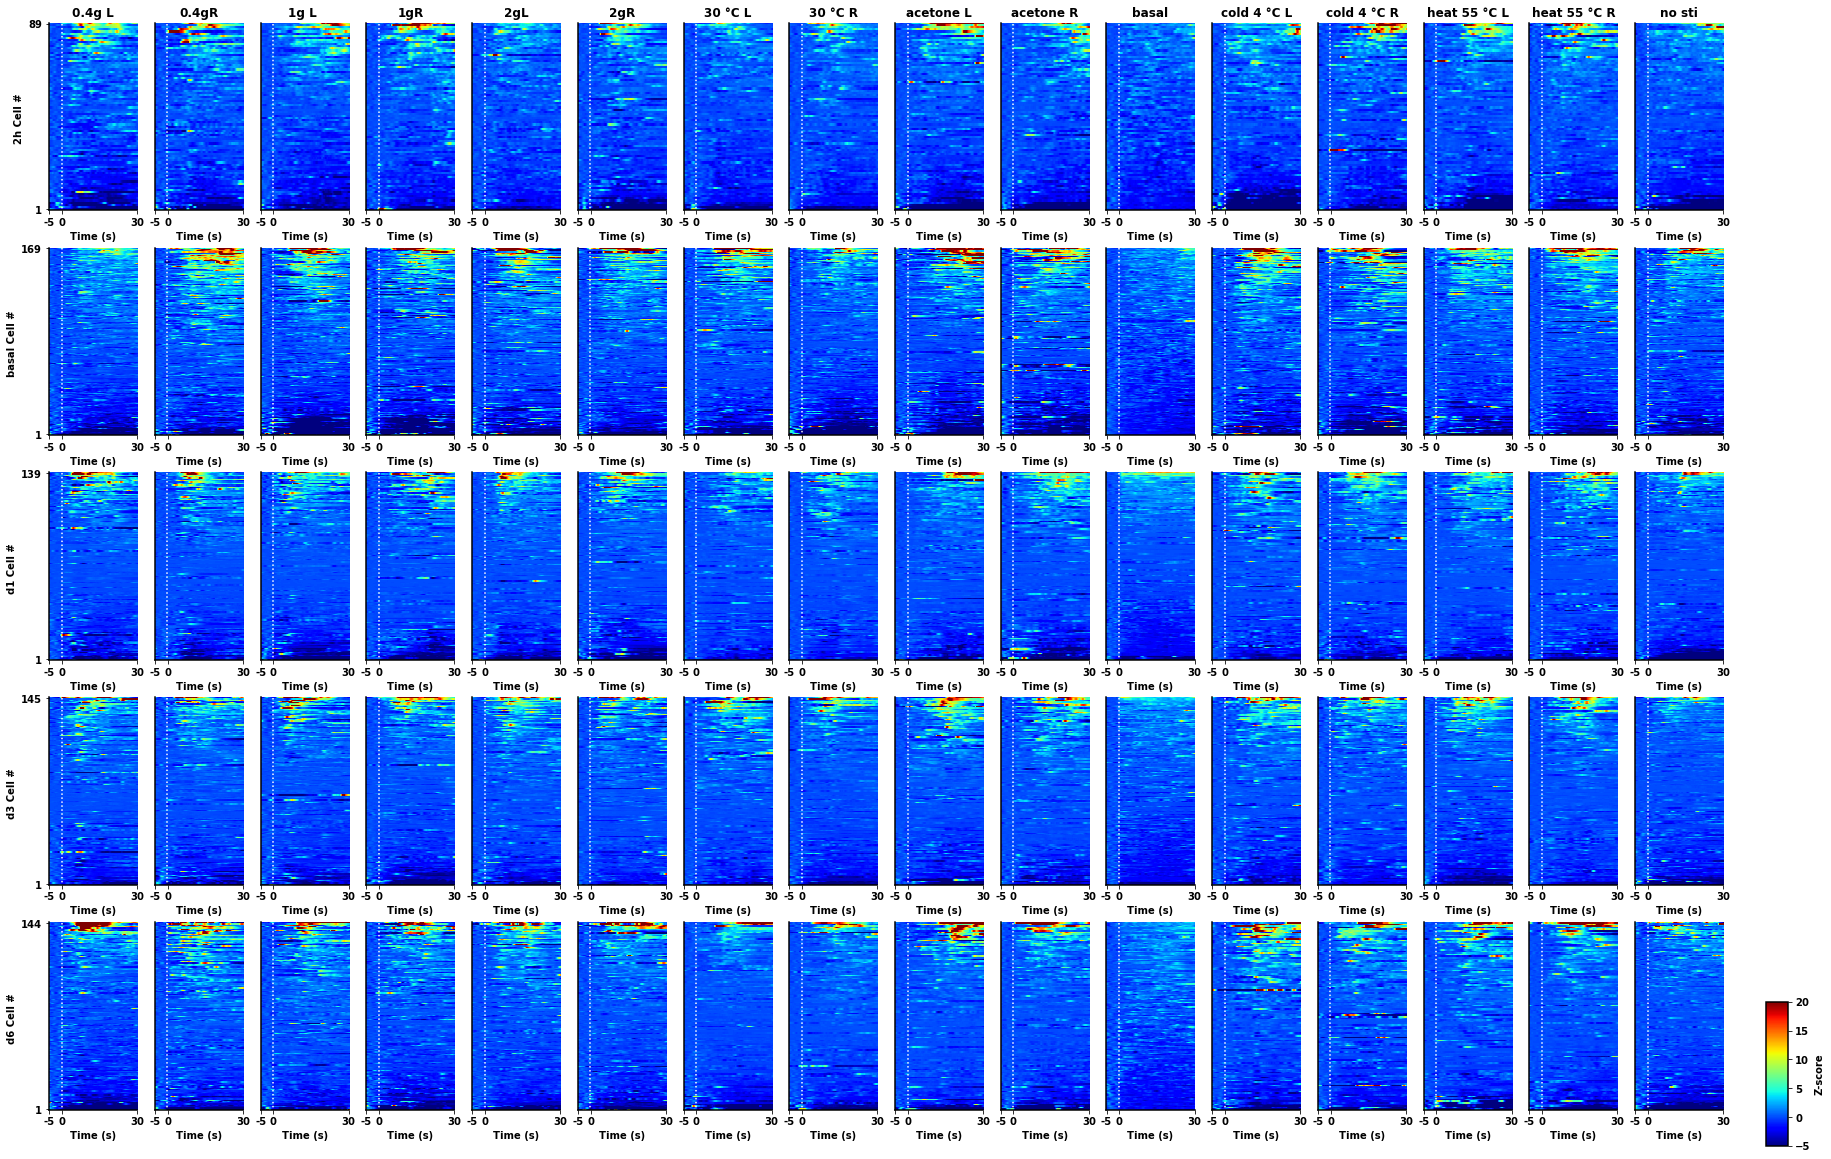

In [107]:
reload(caf)
save_plot = False
caf.all_stim_heatmap(signal_z_glob, sensory_meta, save_plot, save_dir)

13652-1


/Users/shihchelin/Documents/Programming/GitHub/PVT-Ca-data-analysis-script/Ca_imaging_postprocessing_functions.py:431: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  indx = 0


13652-2
13786-1
13786-2
14276-2


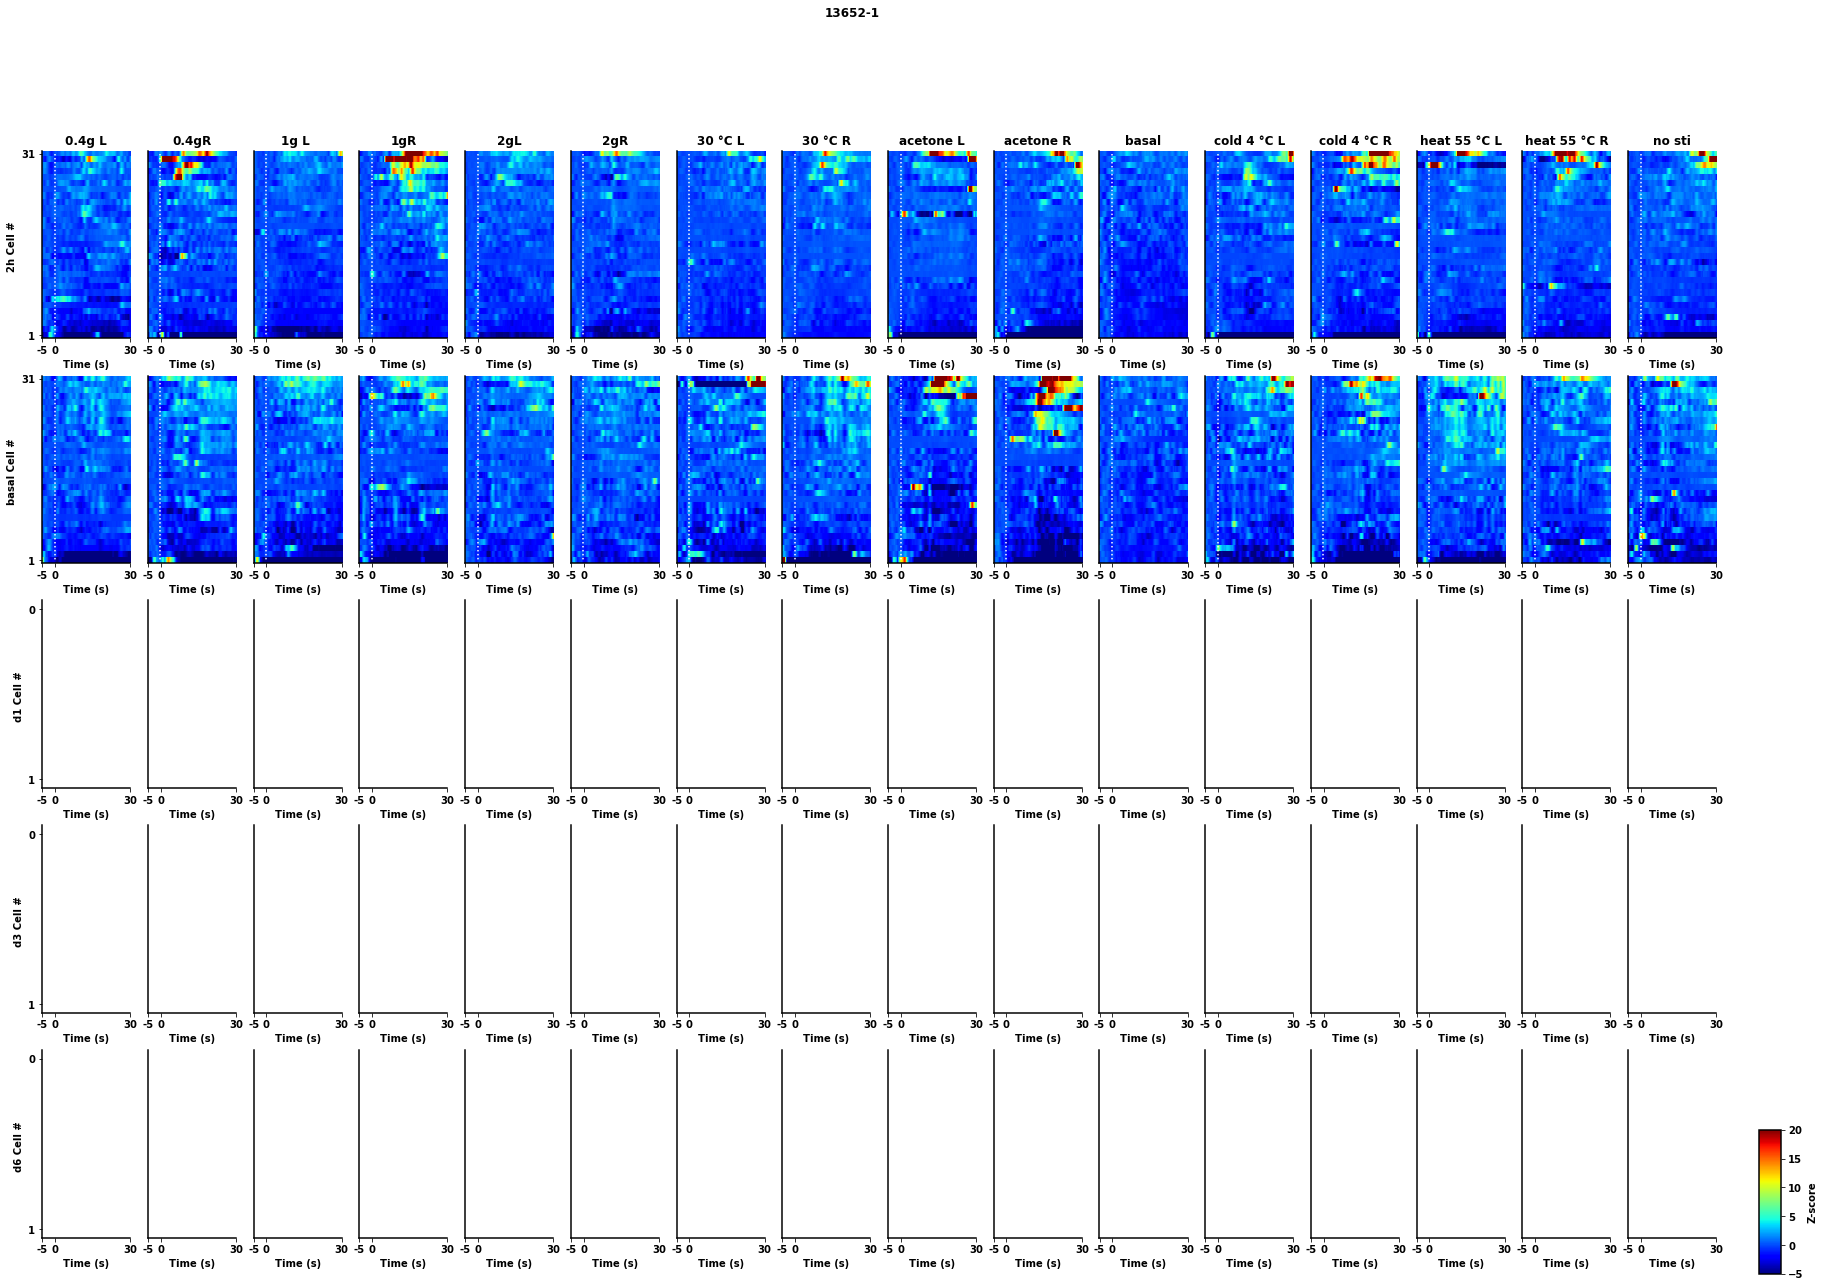

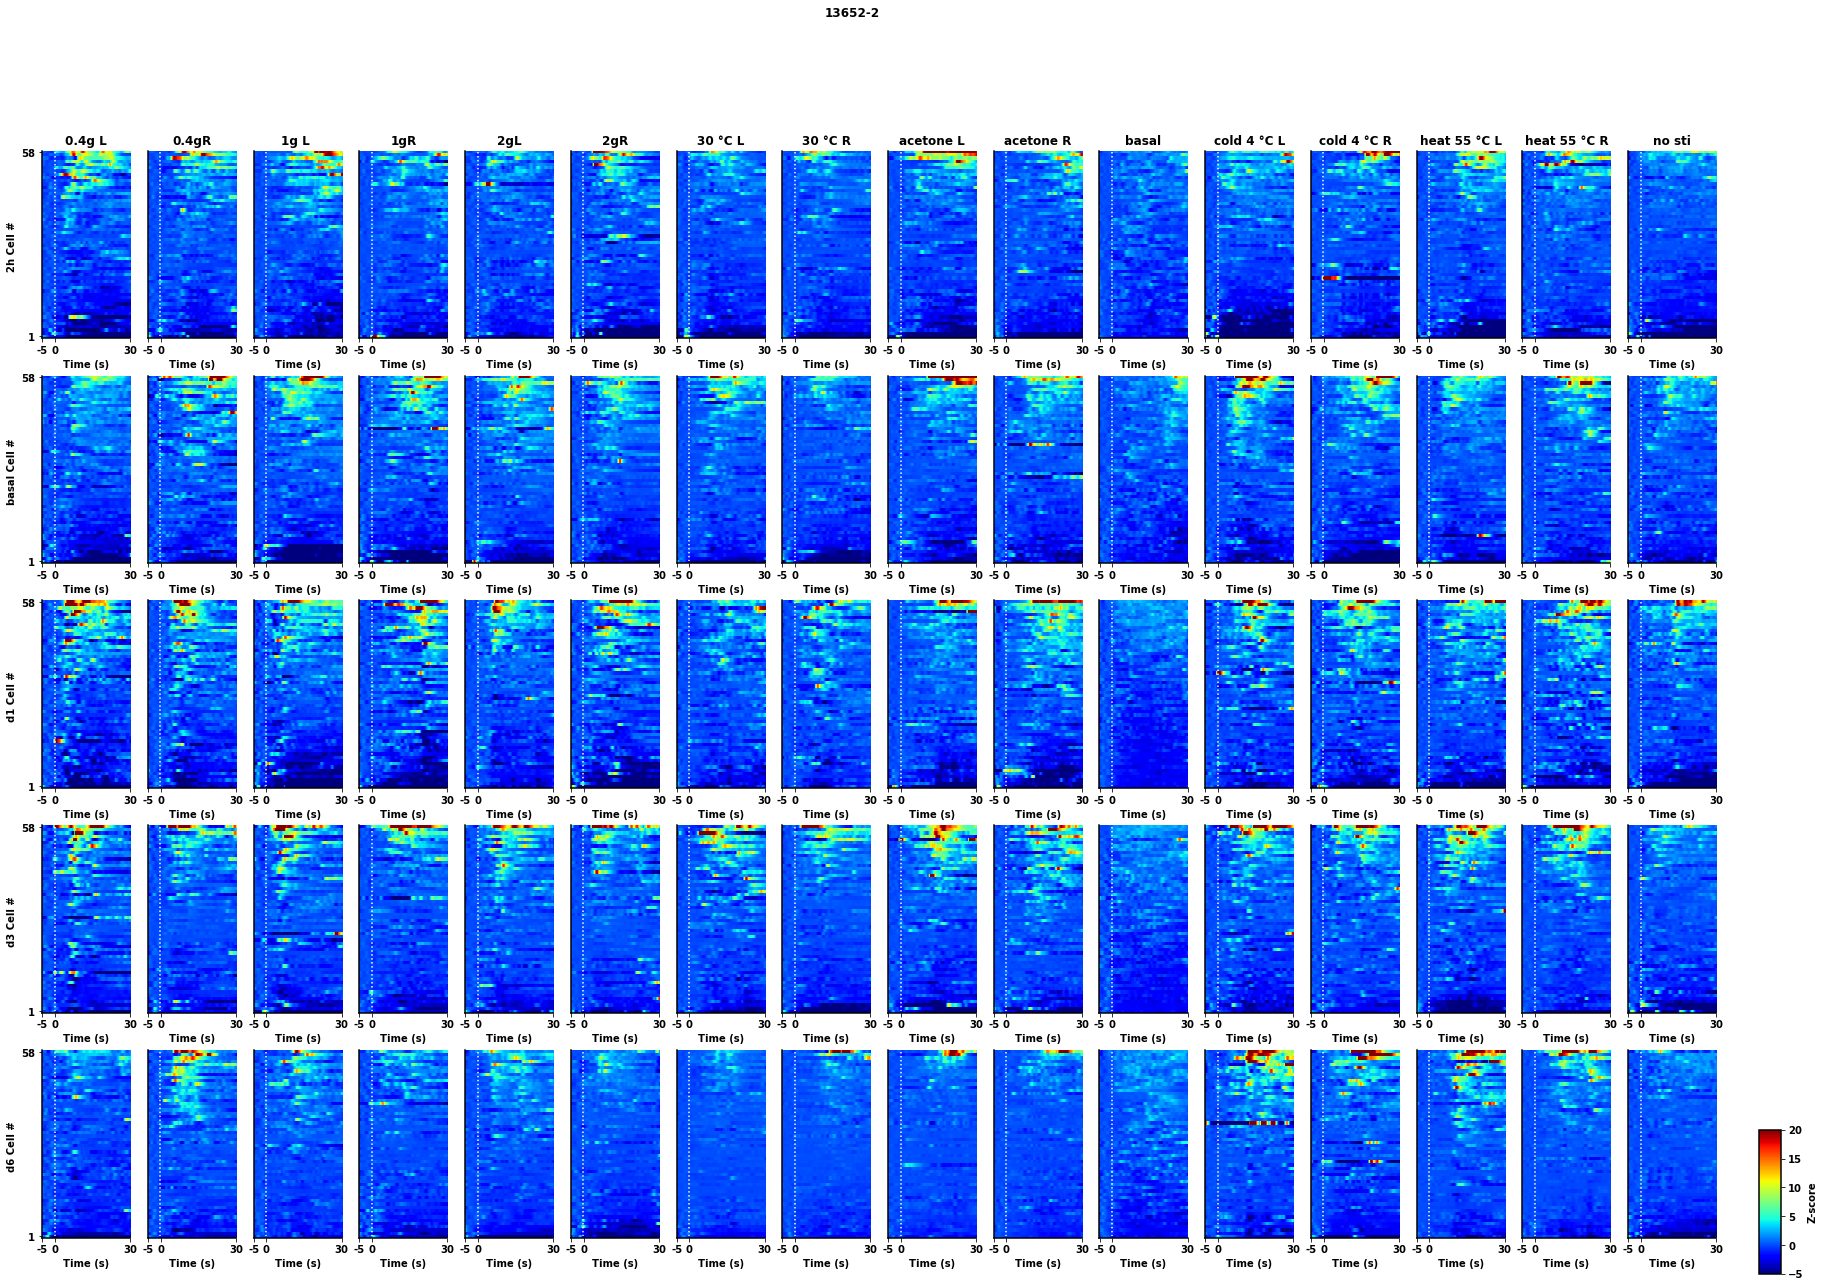

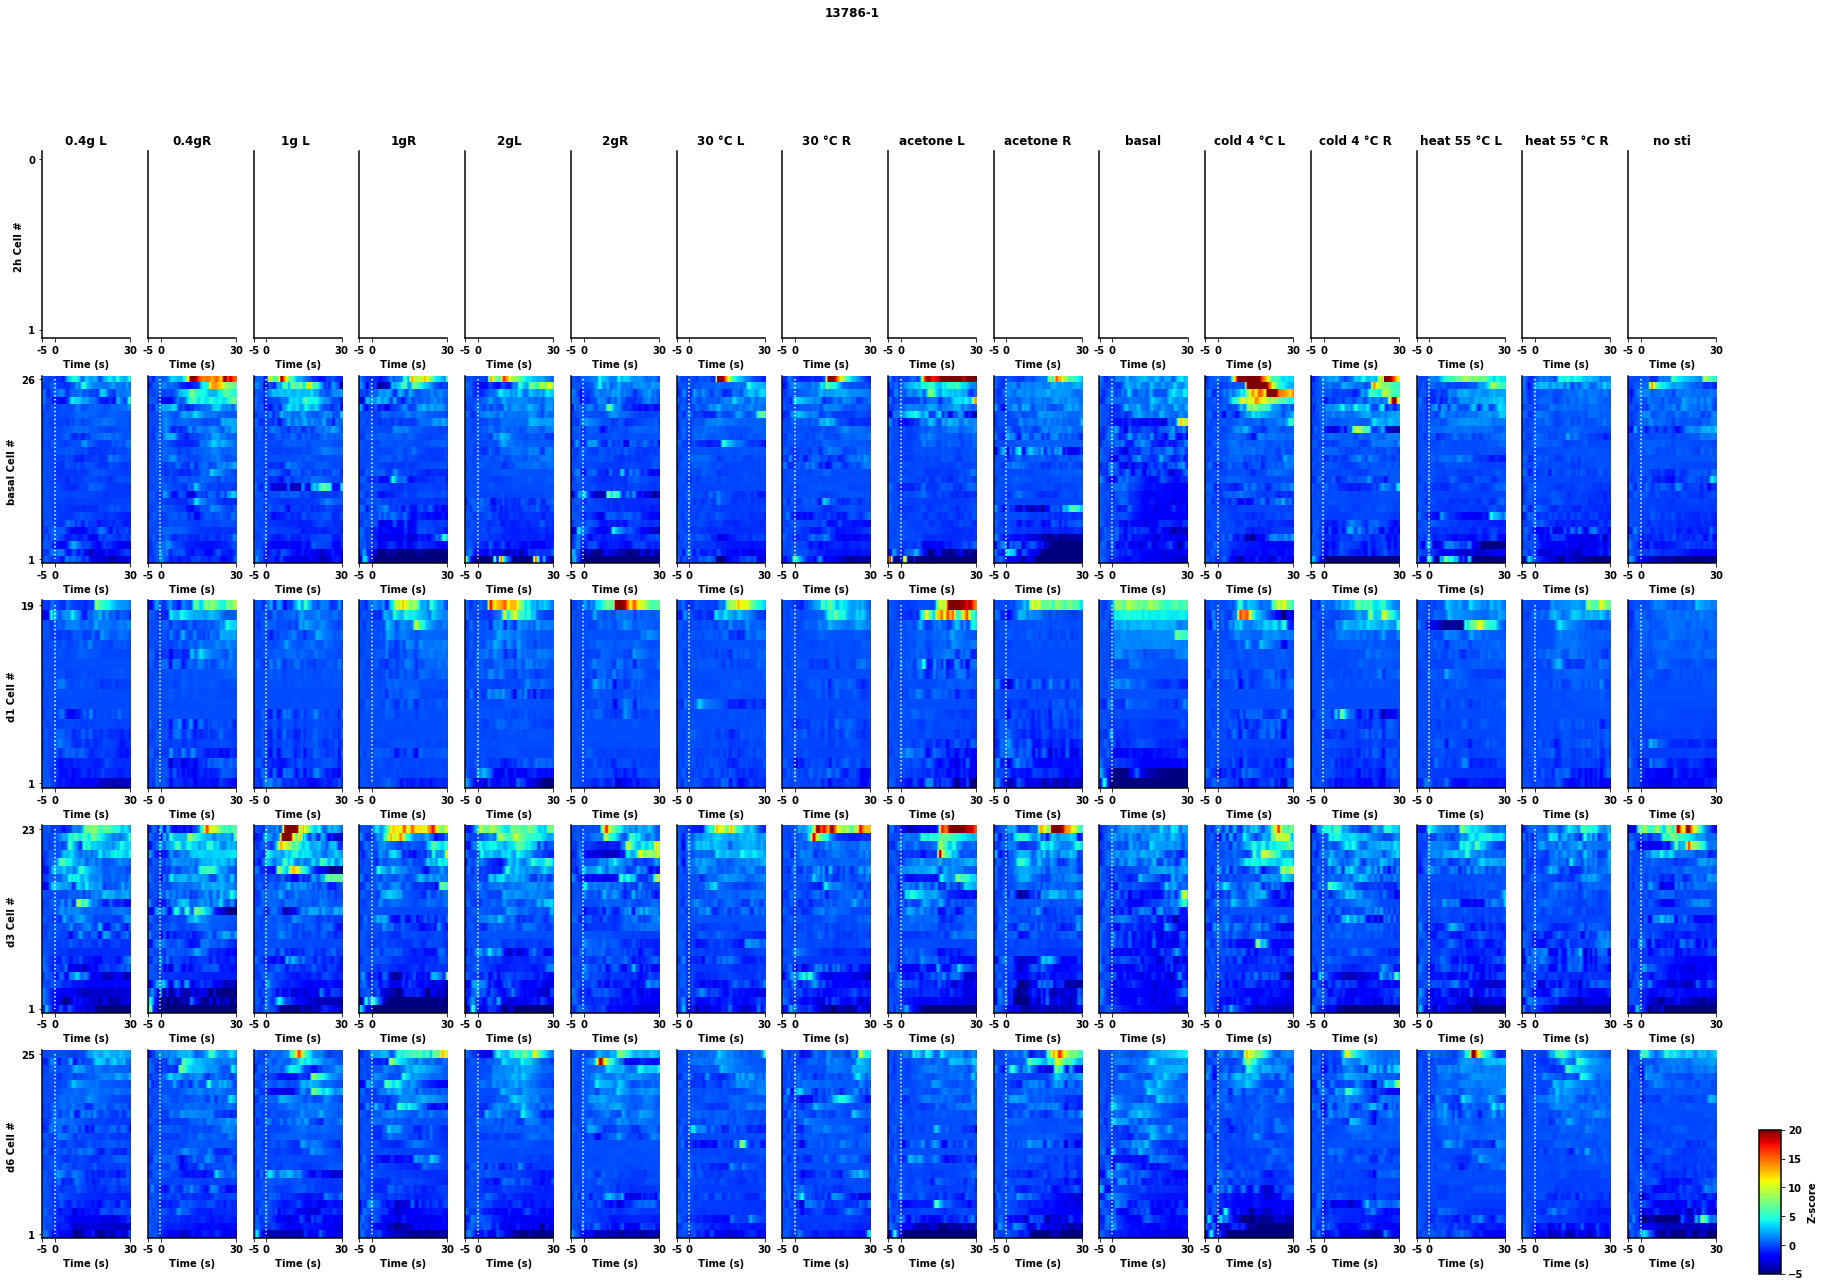

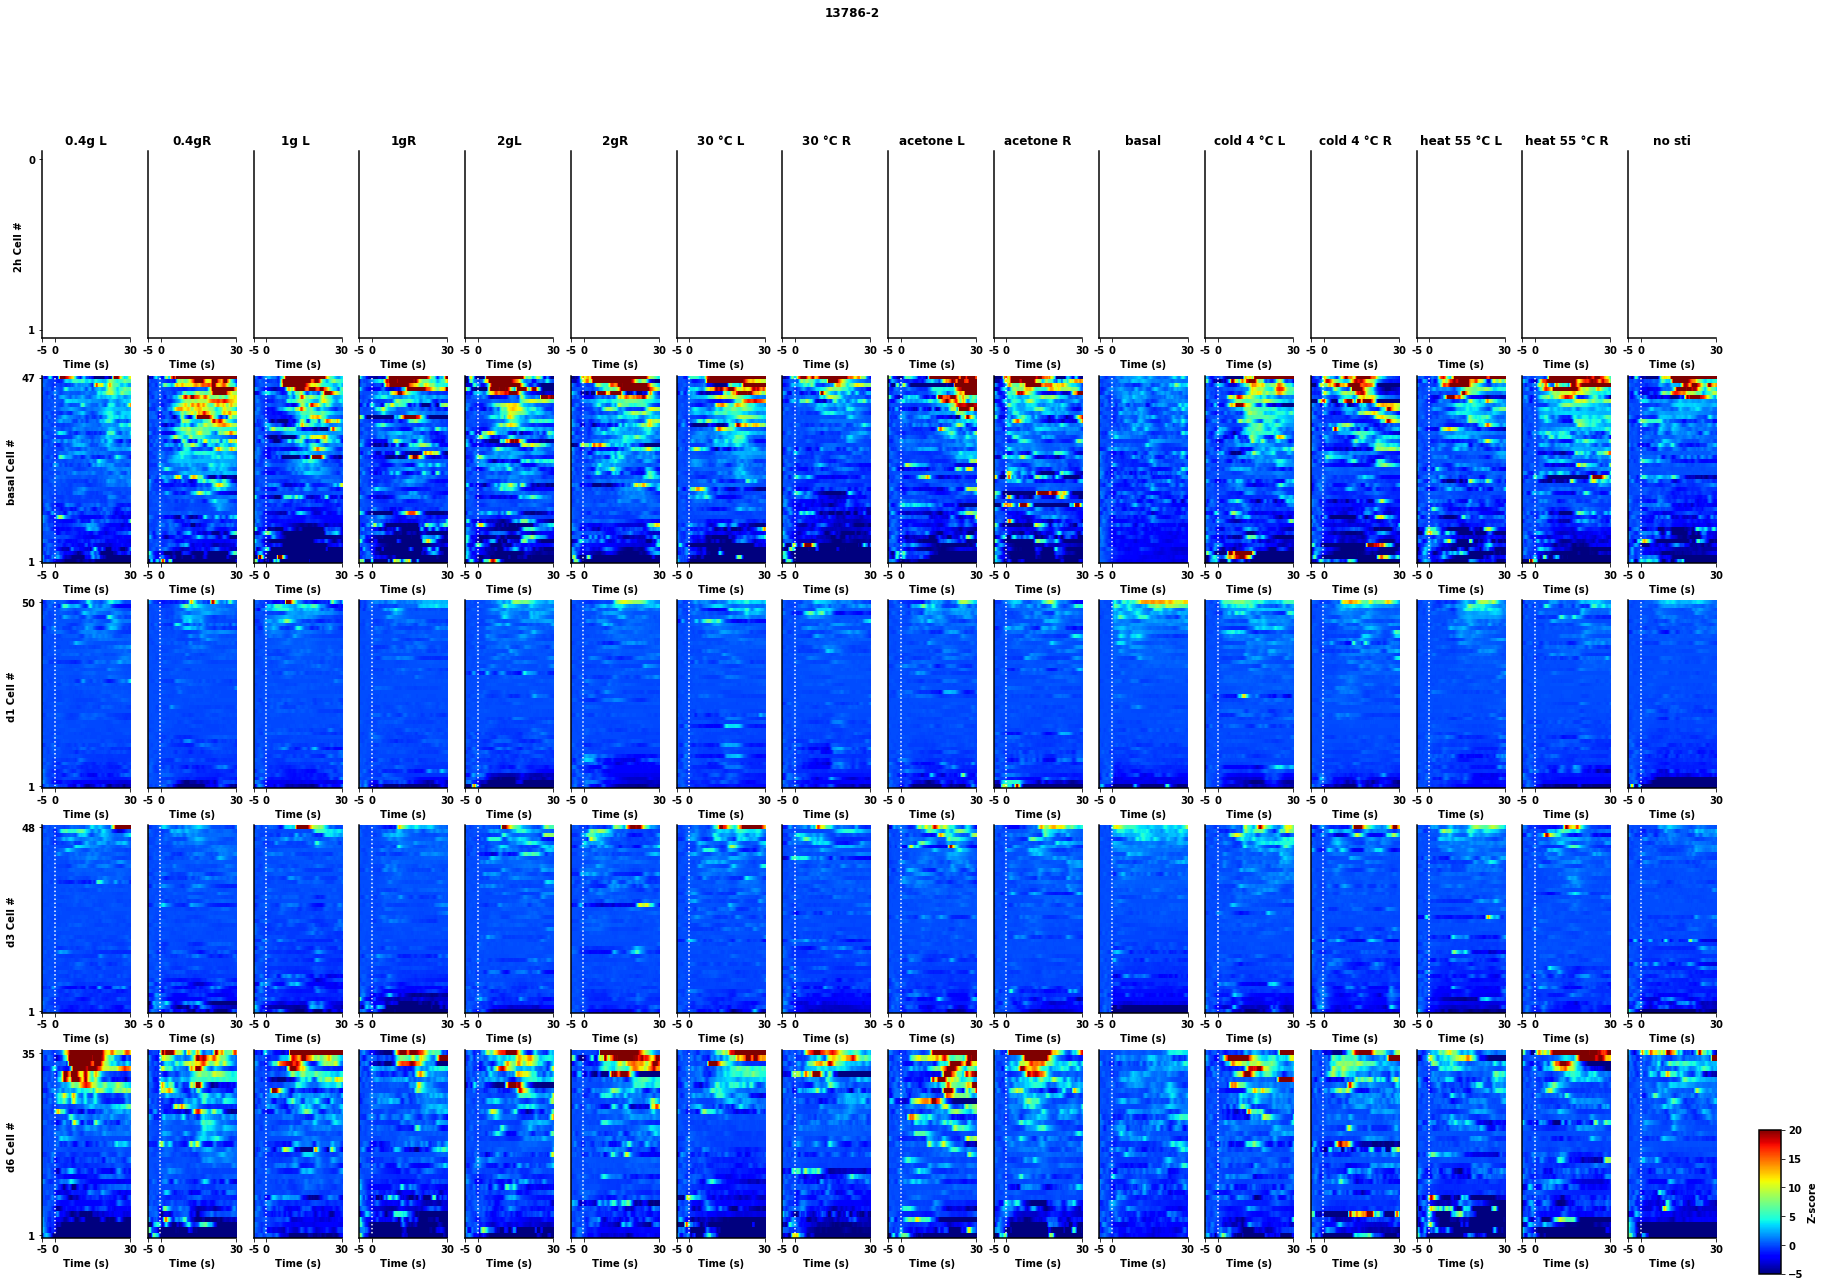

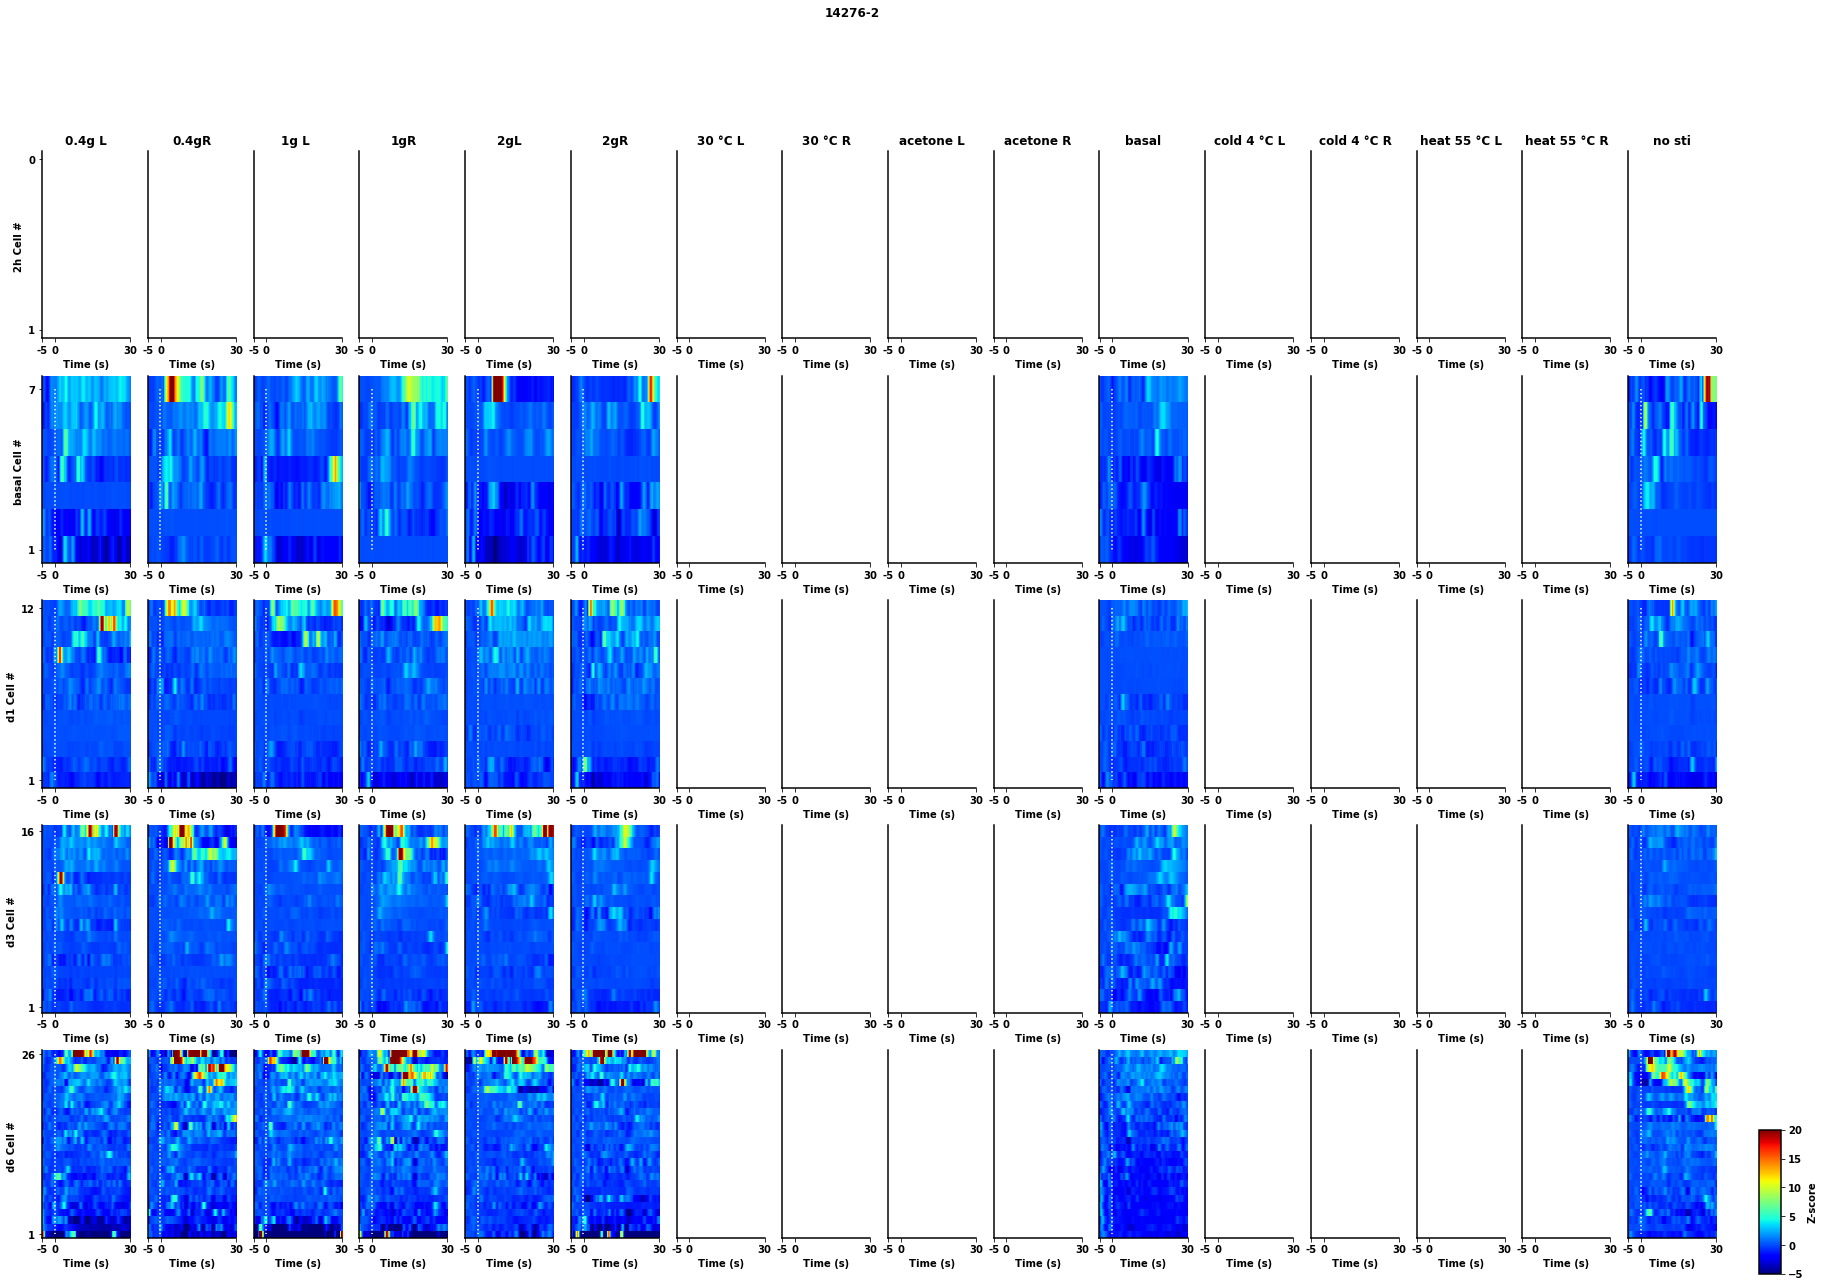

In [109]:
reload(caf)
save_plot = False
caf.all_stim_heatmap_ind(signal_z_glob, sensory_meta, save_plot, save_dir)

# **Cell classification**
---

In [49]:
reload(caf)

bin_thres = 2.5 # cutoff value for determining responsive bin activity
bin_num_cutoff = 2 # Cutoff for the minimal amount of responsive bins to determine responsive neurons to certain stimulus

export_table = True
save_prefix = 'Z-score bin' #Text to add in front of exported file name

#Binned activity based classification 
active_bin, inhibited_bin, net_response, response_type = caf.neuron_classification_bin(sensory_meta,bin_thres, bin_num_cutoff, save_prefix , export_table, save_dir)

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------
# Z-score mean based classification - Not adopted
# thres_Z = 2
# time = sensory_meta['Trace time']
# st_indx = np.where(time < 0)[0].max()
# Z_diff = signal_z_loc[st_indx:,:].mean(axis = 0) # Calibrate mean difference in Z-score after stim onset
# res_z = caf.neuron_res_Z(Z_diff,  thres_Z) # Classify units based on 'thres_Z'

### **Stimulus order ref.**

In [ ]:
[print(f"{i}: {sensory_meta['Unique stim list'][i]}") for i in range(len(sensory_meta['Unique stim list']))][0]

0: 0.4g L
1: 0.4gR
2: 1g L 
3: 1gR
4: 2gL
5: 2gR
6: 30 °C L
7: 30 °C R
8: acetone L
9: acetone R
10: basal
11: cold 4 °C L
12: cold 4 °C R
13: heat 55 °C L
14: heat 55 °C R
15: no sti


### **State order ref.**

In [23]:
[print(f"{i}: {sensory_meta['Unique state list'][i]}") for i in range(len(sensory_meta['Unique state list']))][0]

0: 2h
1: basal
2: d1
3: d3
4: d6


In [ ]:
stim_list = sensory_meta['Unique stim list'][[0,2,4,6,8,11,13,1,3,5,7,9,12,14]] # Check for "Stimulus or ref." block
state_list = sensory_meta['Unique state list'][[1,0,2,3,4]] # Check for "State or ref." block
group_color = ['green','red','gray'] #Color representing excited, inhibited, no response cells 

# **Plotting**
---

## **Stack bar plot**

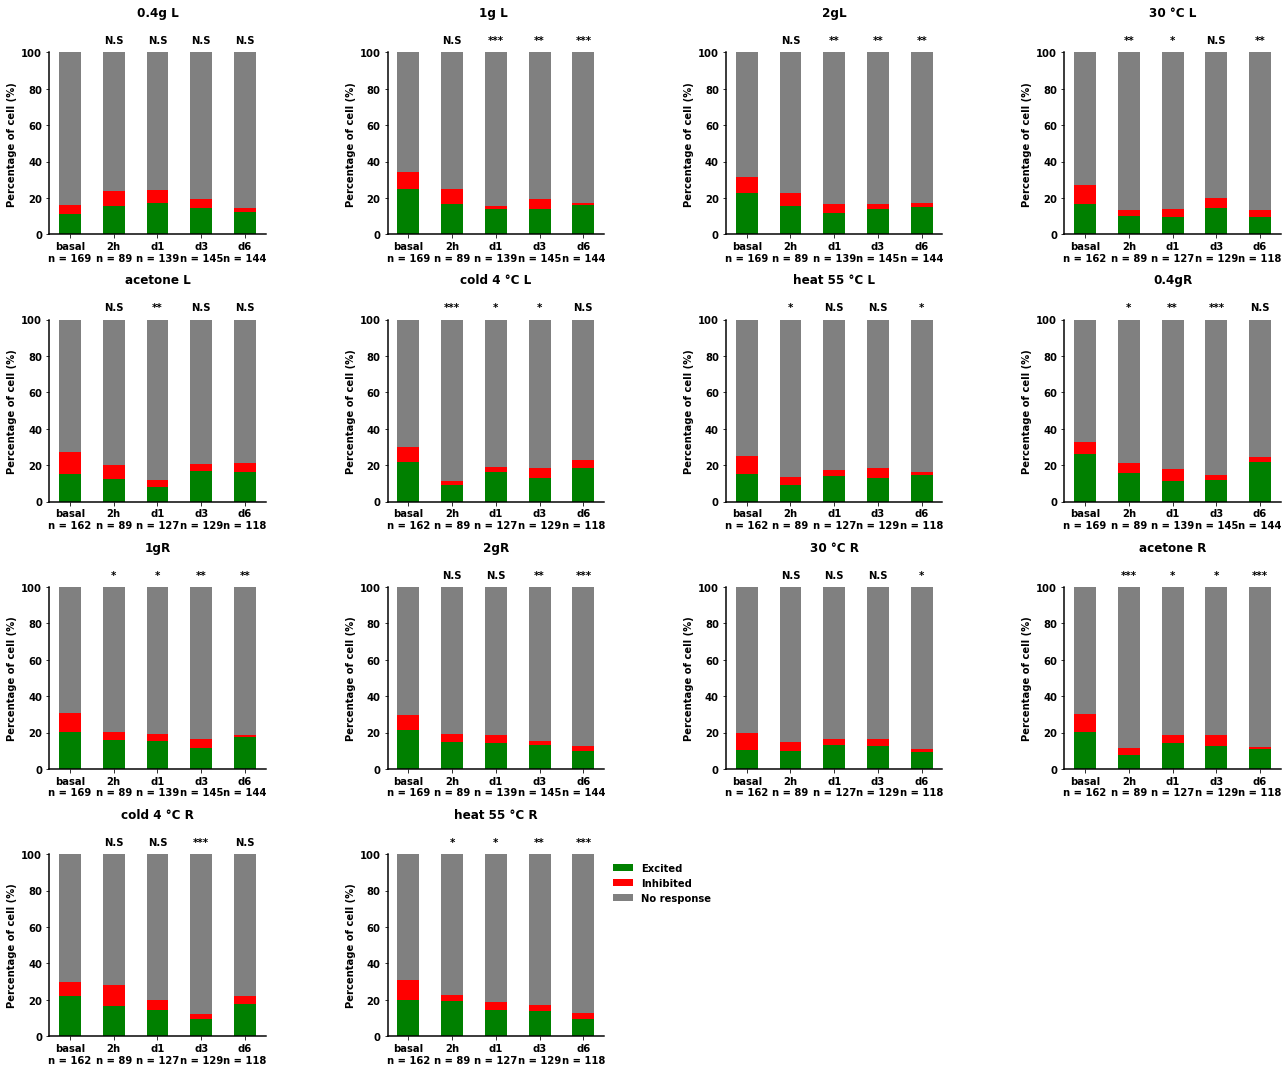

In [105]:
reload(caf)
figure_size = (18,15) 
save_prefix = 'Bin-' #Preffix for file name of save figures
save_plot = False
#choose res_n for stack bar plot
caf.response_stack_bar(response_type,sensory_meta,state_list,stim_list ,\
                    fig_ratio =figure_size ,bar_width = 0.5, bar_color= group_color, \
                    save_prefix = save_prefix,save_plot =save_plot, save_dir = save_dir)

## **Heatmap & trace of all cell classes** 

In [ ]:
#saving format: 
#for heatmap: mouse ID + cell ID + response type , make sure sorted traces is used
#for trace: save in seperate file, state + res type + mean/S.E.M + cell number 

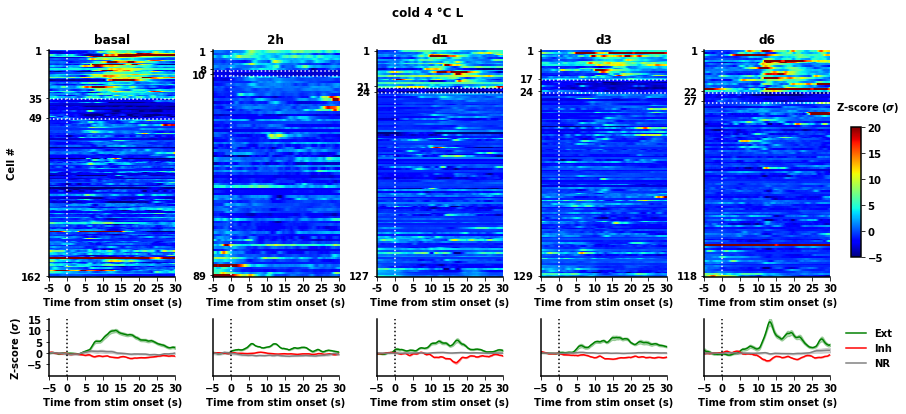

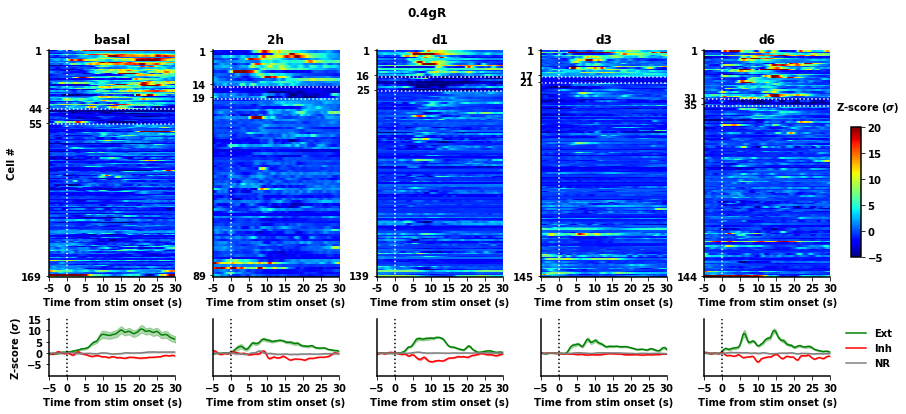

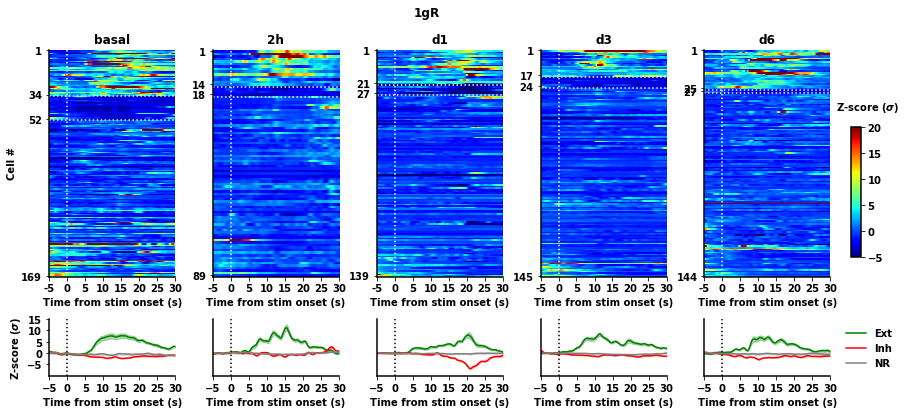

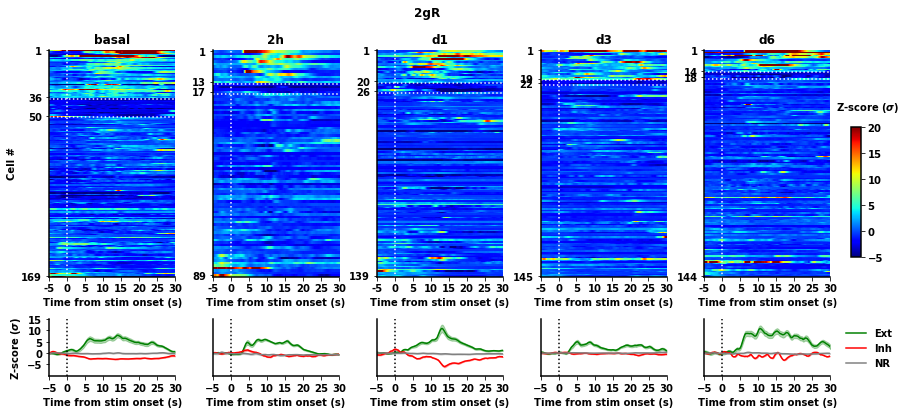

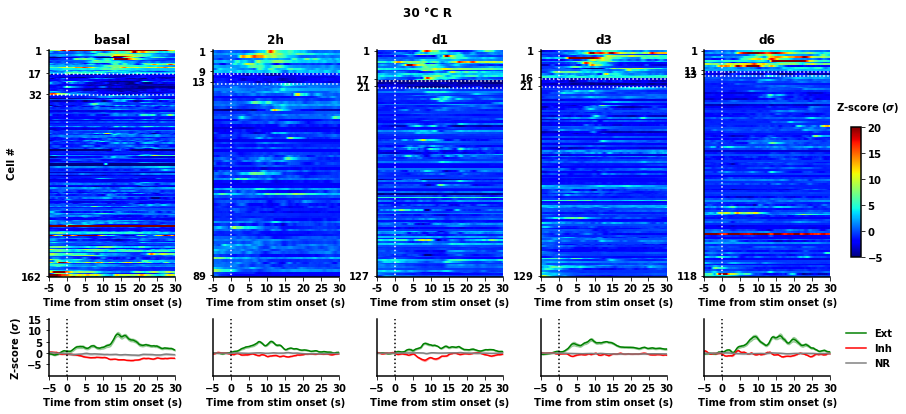

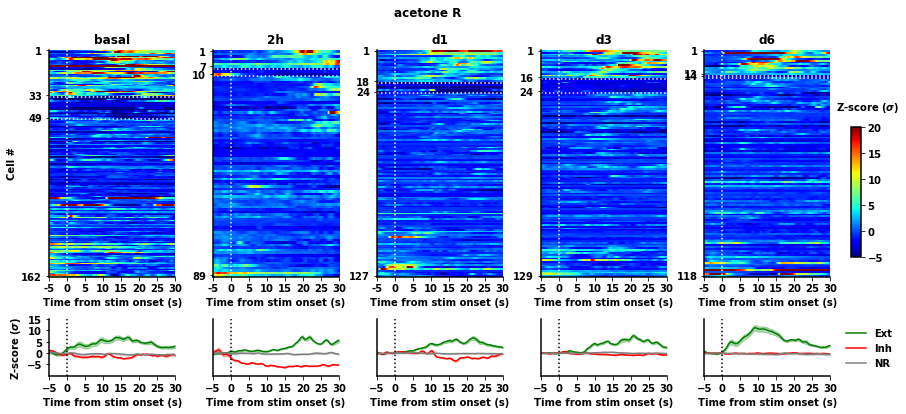

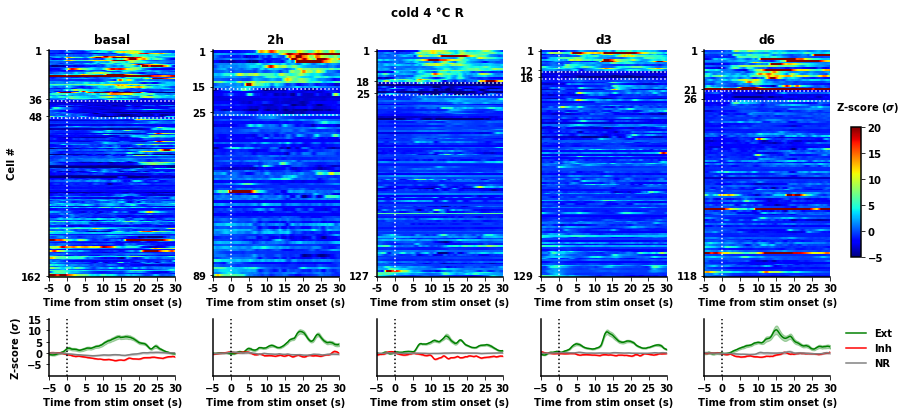

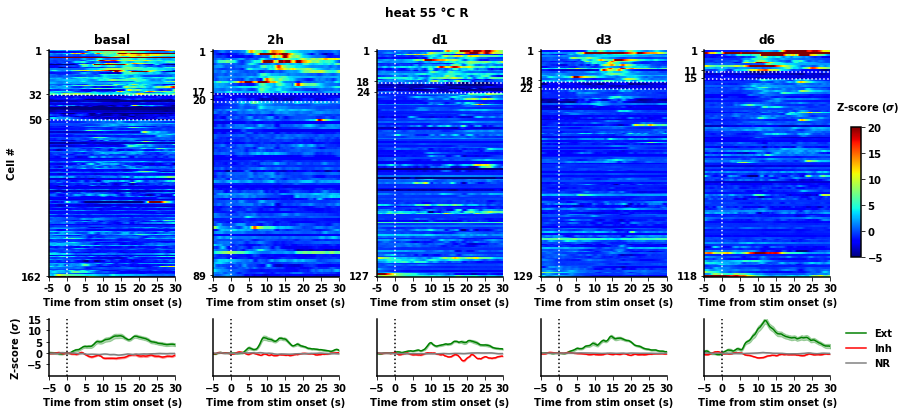

In [113]:
reload(caf)
save_plot= True
# signal_z_glob or signal_z_loc
caf.cell_subset_heatmap(signal_z_glob, sensory_meta, response_type, net_response, stim_list, state_list, group_color, save_plot, save_dir)

## **Classify through clustering**

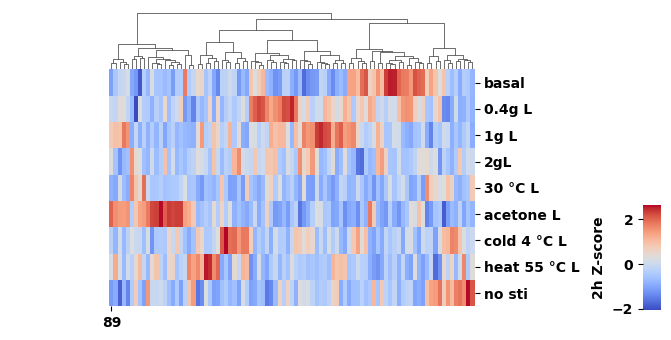

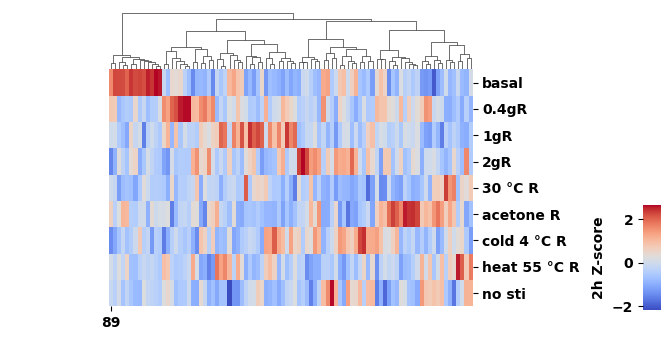

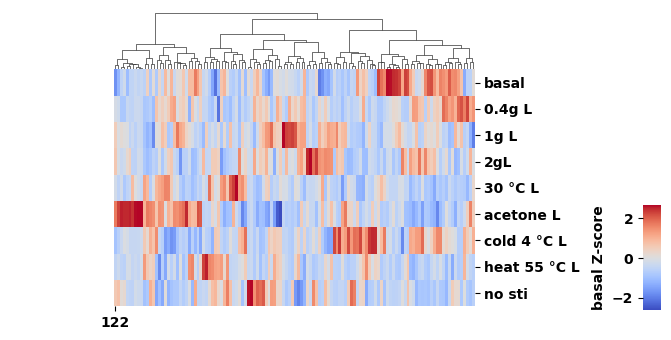

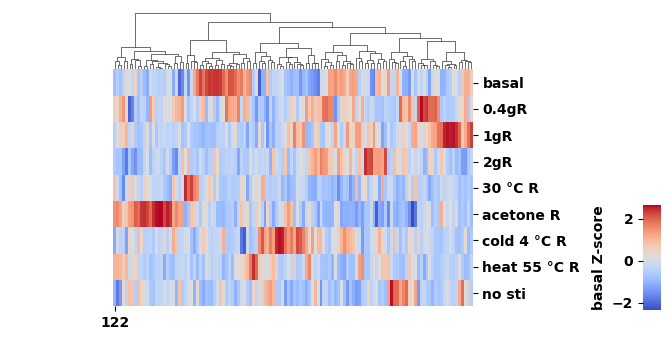

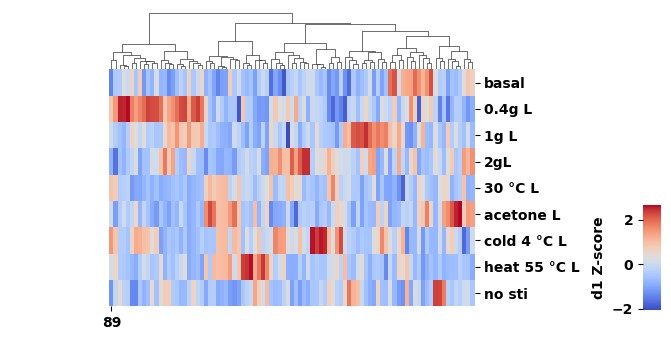

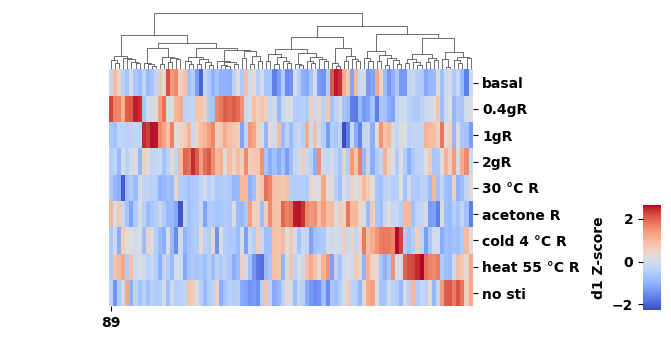

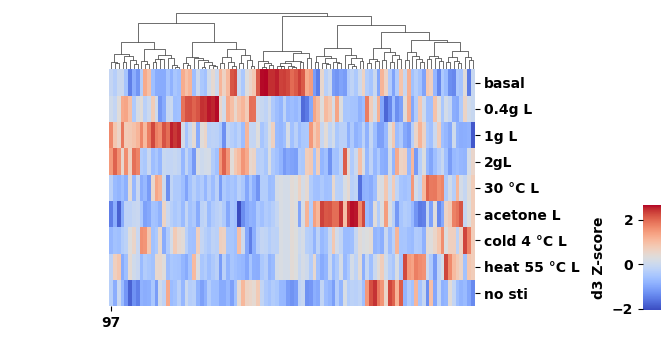

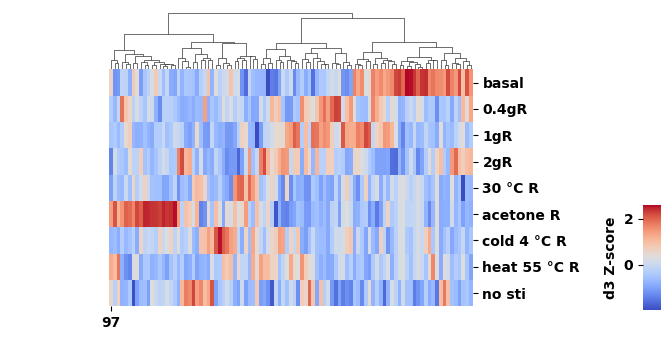

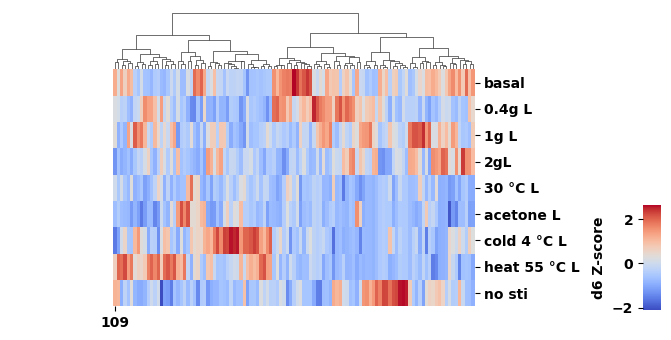

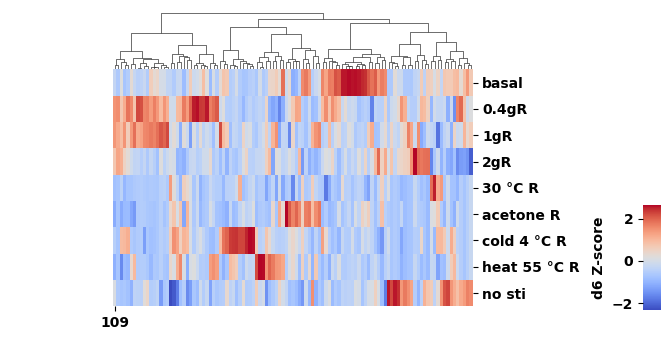

In [9]:
uni_ID = np.array([f'{m}{id}' for m ,id in zip(sensory_meta['Mouse ID'], sensory_meta['Cell ID'])])
left_stim_indx = [10,0,2,4,6,8,11,13,15] 
right_stim_indx = [10,1,3,5,7,9,12,14,15] 
clustering_method = 'ward' # 'single', 'average', 'complete','weight', 'median','centroid','ward'

save_plot = True

caf.stim_cluster_heatmap(sensory_meta,clustering_method, left_stim_indx, right_stim_indx, \
                        uni_ID, state_list, stim_list, save_plot, save_dir)

In [10]:
# output_df = {
#     'Mouse ID': sensory_meta['Mouse ID'],
#     'Cell ID': sensory_meta['Cell ID'],
#     'CP stage': sensory_meta['CP stage'],
#     f'Active bin number (thres = {thres})': active_bin,
#     f'Silenced bin bumber (thres = {thres})': inhibited_bin,
#     'AUC diff after stim': diff,
#     'Cell class (responsive bin number)': res_n,
#     'Standardized mean stim response': Z_diff,
#     f'Cell class (Z-score diff, thres =  {thres_Z})': res_z
# }
# out_df = pd.DataFrame(output_df)
# out_df.to_csv('Sensory response cell classification.csv',index = False)

## **Sorted stim-pref cell response heatmap**

In [11]:
chosen_stim_L = np.unique(sensory_meta['Stimulus'])[[10,0,2,6,11,13]] #[10,0,2,4,6,8,11,13,15]
chosen_stim_R = np.unique(sensory_meta['Stimulus'])[[10,1,3,7,12,14]] #[10,1,3,5,7,9,12,14,15]

uni_ID = np.array([f'{m}{id}' for m ,id in zip(sensory_meta['Mouse ID'], sensory_meta['Cell ID'])])

max_z_bin = sensory_meta['Standardized bin'].max(axis = 0) #Maximum standardized bin
res_cutoff= 2 #Criteria for responsive cell (defult=0.4)

hm_range = [0,5] #Range for heatmap colorbar ['Min','Max'] (defult=[0,1])


c:\Users\N713-PostDoc\Desktop\code\Script for Sensory response stimulus\Ca_imaging_postprocessing_functions.py:341: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


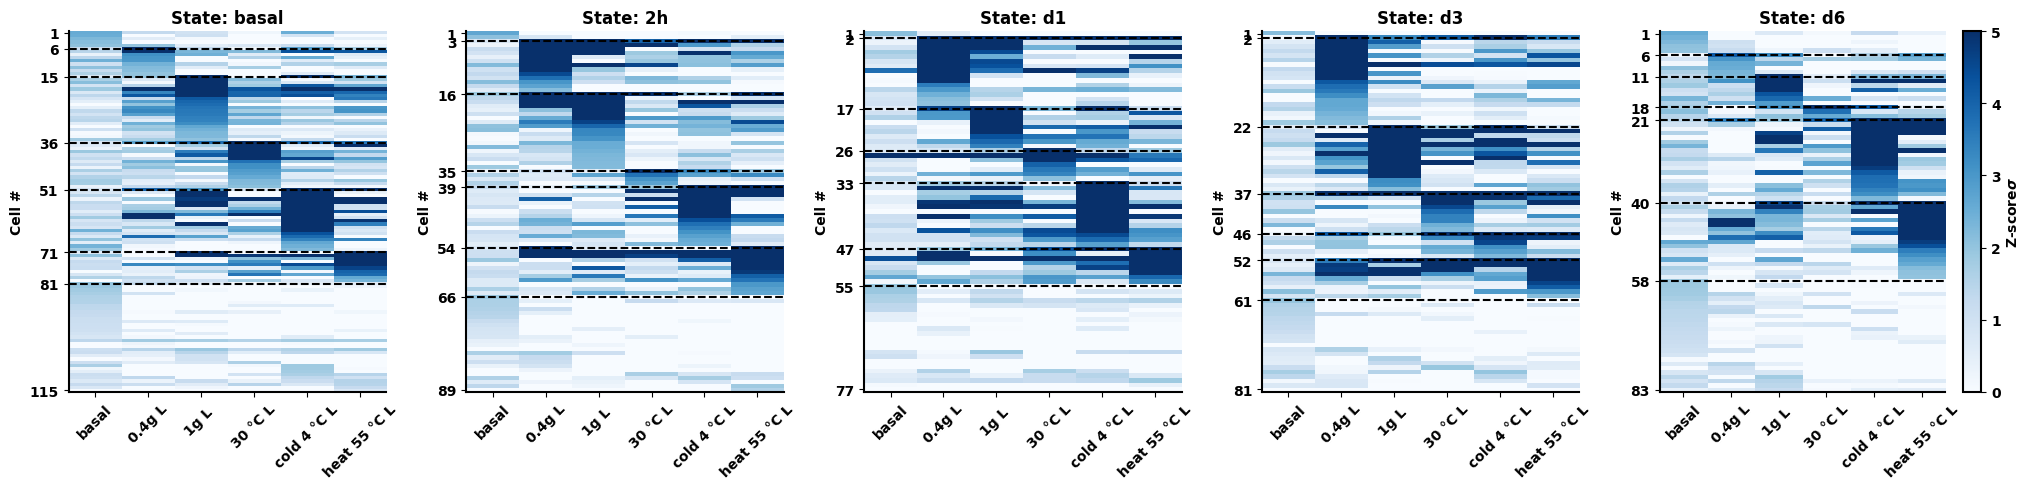

In [12]:
chosen_stim = chosen_stim_L

cbar_label = 'Z-score$\sigma$'
save_prefix = 'Max Bin left '

pair_indx = False # All heatmaps from other stages do not sort the cell
save_plot = True

caf.sort_stim_pref_response_heatmap(max_z_bin ,uni_ID, sensory_meta['Stimulus'],sensory_meta['CP stage'],state_list, \
                                res_cutoff ,hm_range, chosen_stim, cbar_label , save_prefix ,pair_indx,save_plot, save_dir)

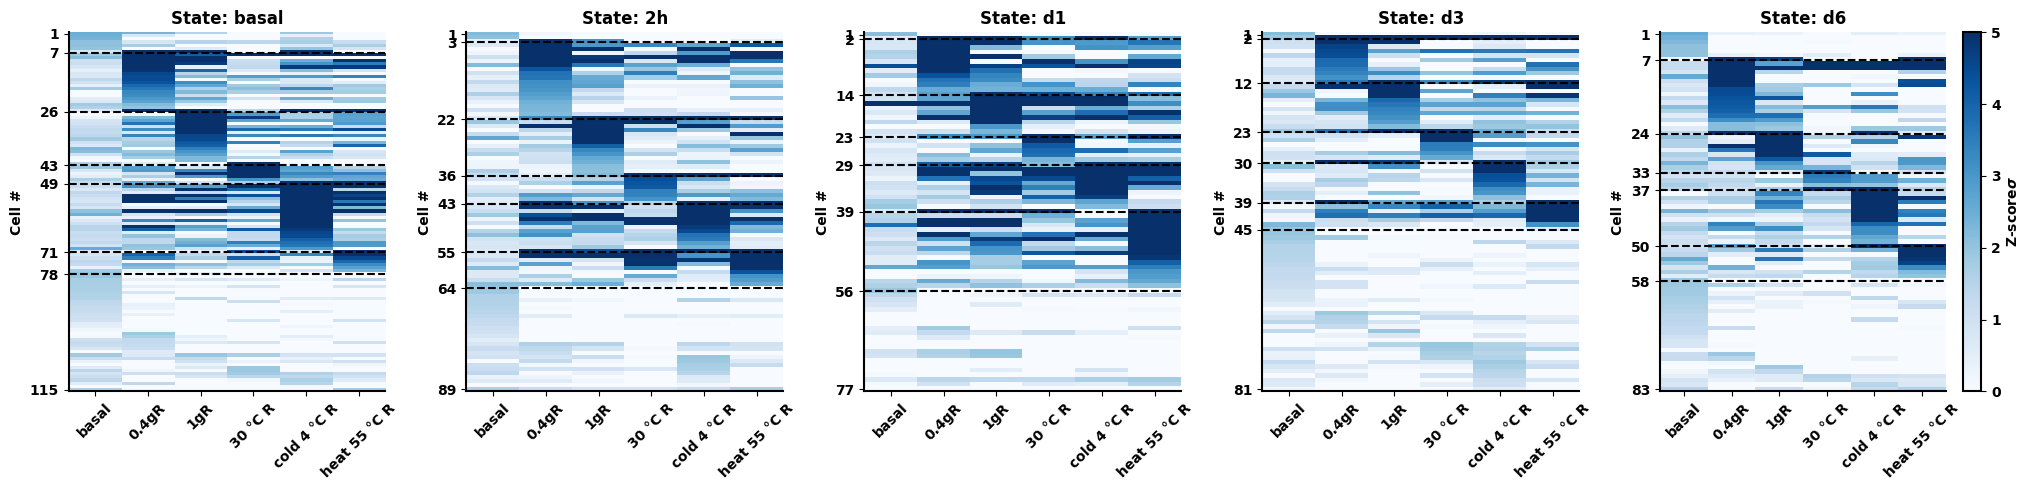

In [13]:
chosen_stim = chosen_stim_R

cbar_label = 'Z-score$\sigma$'
save_preffix = 'Max Bin right '

pair_indx = False # All heatmaps from other stages do not sort the cell
save_plot = True

caf.sort_stim_pref_response_heatmap(max_z_bin ,uni_ID, sensory_meta['Stimulus'],sensory_meta['CP stage'],state_list, \
                                res_cutoff ,hm_range, chosen_stim, cbar_label , save_preffix ,pair_indx,save_plot)

## **Entropy & NSR distributions**

In [14]:
chosen_stim_L = np.unique(sensory_meta['Stimulus'])[[11,0,2,6,12,14]]
chosen_stim_R = np.unique(sensory_meta['Stimulus'])[[11,1,3,7,13,15]]

c:\Users\N713-PostDoc\Desktop\code\Script for Sensory response stimulus\Ca_imaging_postprocessing_functions.py:101: RuntimeWarning: invalid value encountered in log
  p_logp.append(p*np.log(p))


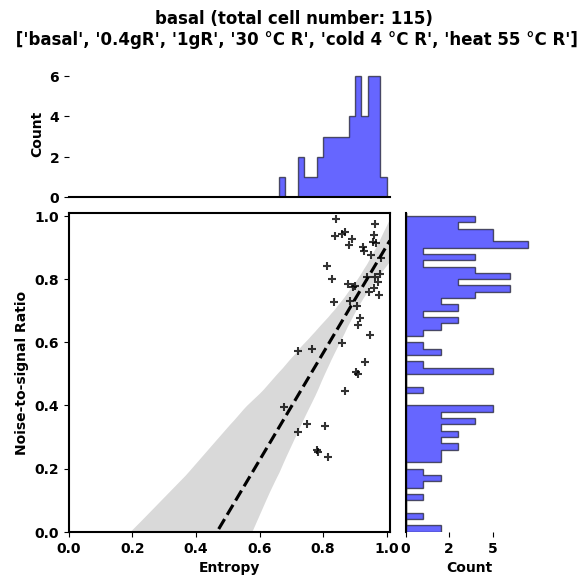

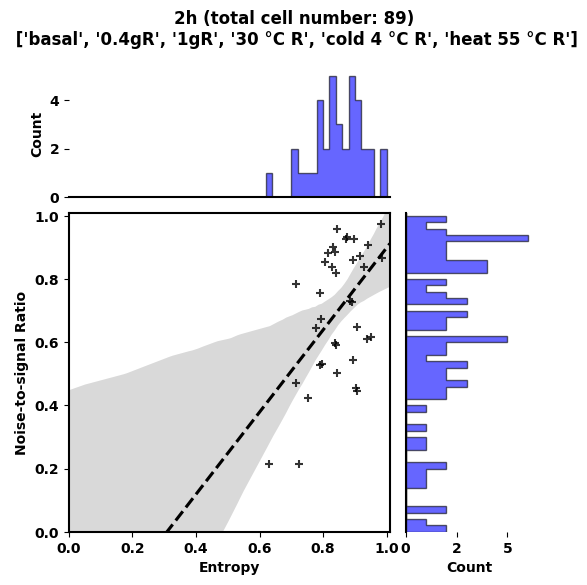

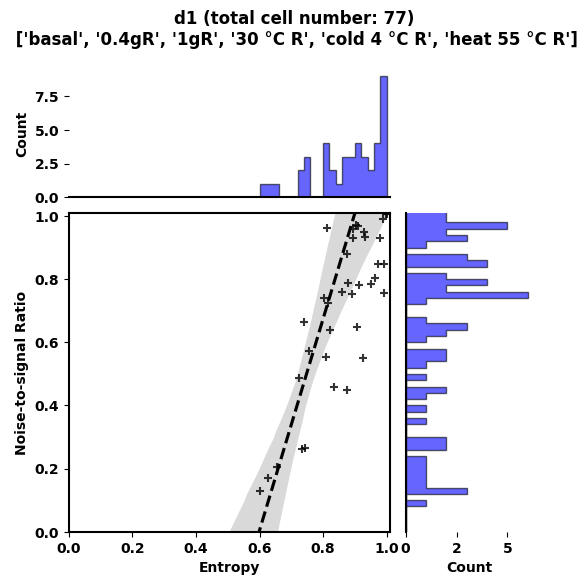

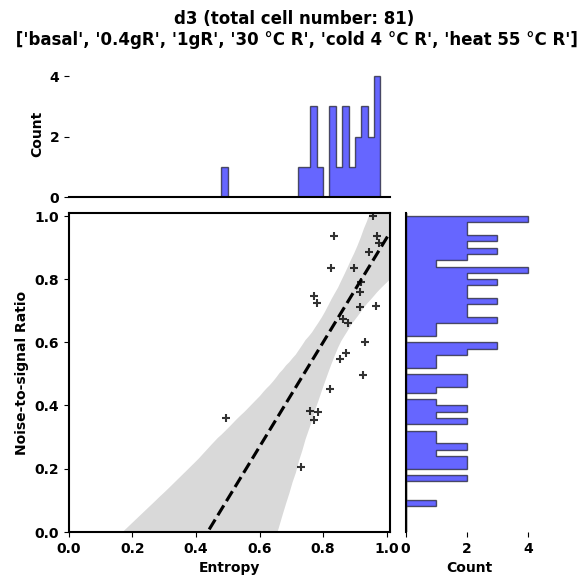

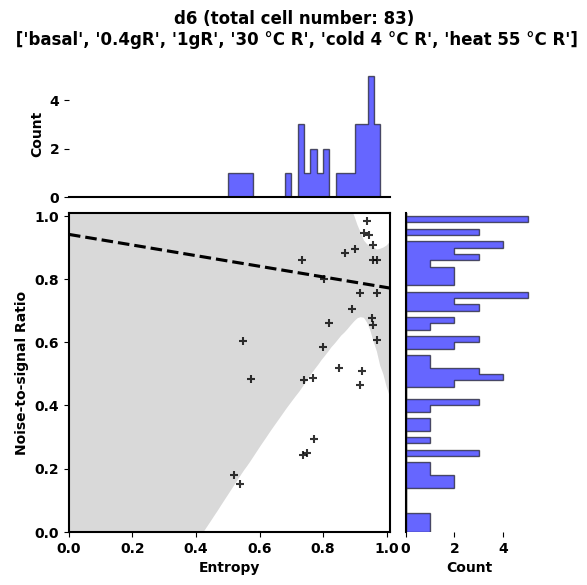

In [15]:
chosn_stim = chosen_stim_R

max_z_bin = sensory_meta['Standardized bin'].max(axis = 0) #Maximum standardized bin

plot_color = ['blue','black'] #Color for [filling histogram, scatter dots]
save_preffix = 'Max Bin left '

save_plot = False

caf.Entropy_NSR_scatter_histogram(max_z_bin, uni_ID, sensory_meta['Stimulus'],sensory_meta['CP stage'],\
                     chosen_stim, state_list , \
                        save_preffix , plot_color, save_plot)